# Descriptive Analysis 🎓
It is a descriptive analysis of the dataset referring to students performance for study purposes.

## ❓ Ask Phase
Does the preparatory course and the level of education of student's parents affect their scores?

## Prepare Phase
The data source used for this case study is [Student Performance in Exams Data](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams). The license of this dataset is unknown and contains 1000 records.

## Process Phase

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Create dataframe
df_students = pd.read_csv('Dataset\StudentsPerformance.csv')
df_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df_students.shape

(1000, 8)

In [5]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df_students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df_students[['gender','race/ethnicity', 'parental level of education','lunch', 'test preparation course']].nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [8]:
df_students.duplicated().sum()

0

## Create Profile Report

In [9]:
profile_students = ProfileReport(df_students)

In [10]:
profile_students

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
profile_students.to_file('Student_Performance_Report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Analyse Phase and Share Phase

In [12]:
# Percentage of students by gender
df_students['gender'].value_counts( normalize=True ) * 100

female    51.8
male      48.2
Name: gender, dtype: float64

In [13]:
# Number of students by ethnicity
df_students['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [14]:
# Number of students by parental level of education
df_students['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [15]:
# Number of students by lunch
df_students['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [16]:
# Number of students by test preparation course
df_students['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

### Analysis of scores by test preparation course

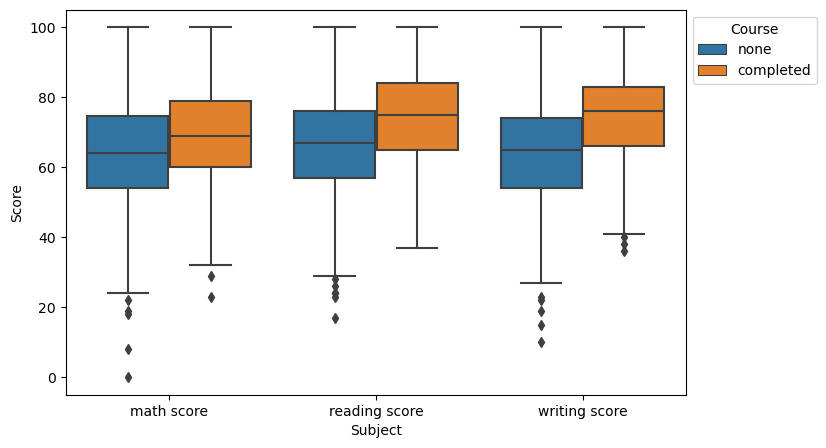

In [17]:
#define figure size
plt.figure(figsize=(8,5))

#display scatterplot
sns.boxplot(
    data=df_students.melt(id_vars=['test preparation course'], value_vars=['math score', 'reading score', 'writing score'],
                 var_name='Subject', value_name='Score'),
    x='Subject',
    y='Score',
    hue='test preparation course'
)
plt.legend(bbox_to_anchor=(1,1), loc='best', title='Course')
plt.show()

In this analysis, we observed that students who took a preparatory course had the **highest** averages.

### Analysis of scores by parental level education and if make test preparation course or not

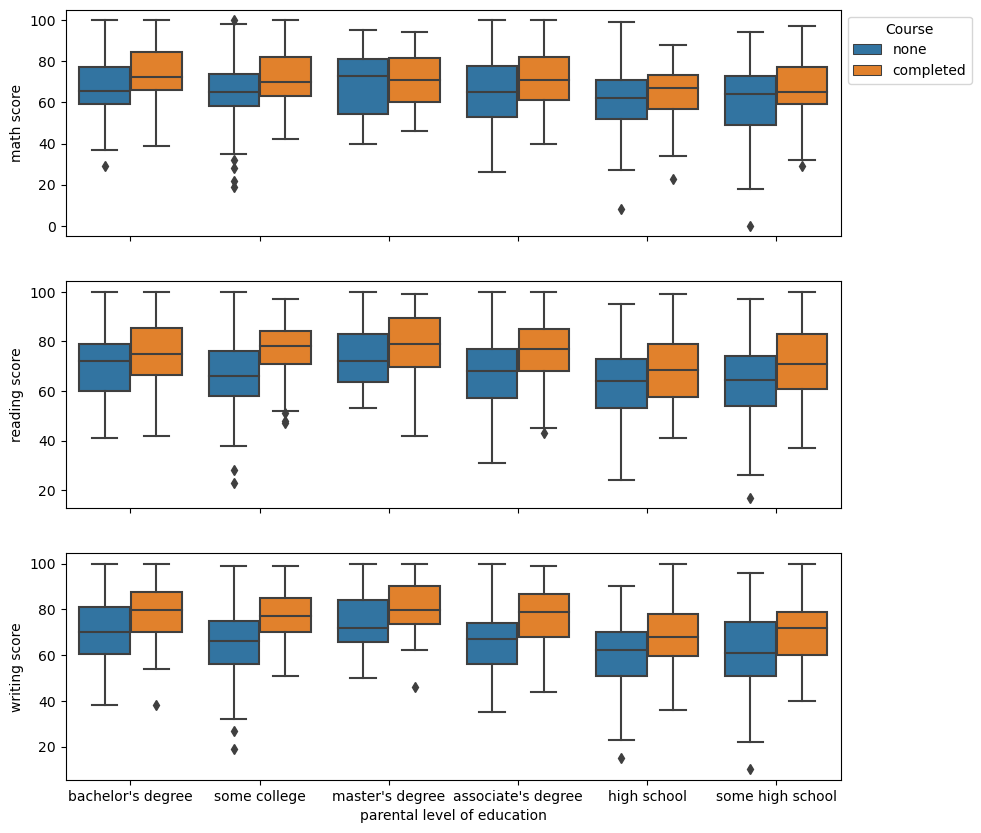

In [18]:
#define figure size
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

#display scatterplot
sns.boxplot(data=df_students, x='parental level of education', y='math score', hue='test preparation course', ax=axes[0])
axes[0].set(xlabel=None)
axes[0].legend(bbox_to_anchor=(1,1), loc='best', title='Course')
sns.boxplot(data=df_students, x='parental level of education', y='reading score', hue='test preparation course', ax=axes[1])
axes[1].set(xlabel=None)
axes[1].legend().remove()
sns.boxplot(data=df_students, x='parental level of education', y='writing score', hue='test preparation course', ax=axes[2])
axes[2].legend().remove()

plt.show()

In [19]:
df_students.groupby(by=['parental level of education', 'test preparation course']).mean()['math score'].reset_index()

,parental level of education,test preparation course,math score
0,associate's degree,completed,71.829268
1,associate's degree,none,65.571429
2,bachelor's degree,completed,73.282609
3,bachelor's degree,none,66.902778
4,high school,completed,65.000000
5,high school,none,60.992857
6,master's degree,completed,70.600000
7,master's degree,none,69.307692
8,some college,completed,71.454545
9,some college,none,64.892617


In this graph, we analyze that students who have parents with a master's degree, even though they have not taken preparatory courses, have a slightly higher average in mathematics than those who have taken preparatory courses.

In [20]:
df_students['mean'] = round(df_students.iloc[:, 5:].mean(axis=1),2)
df_students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


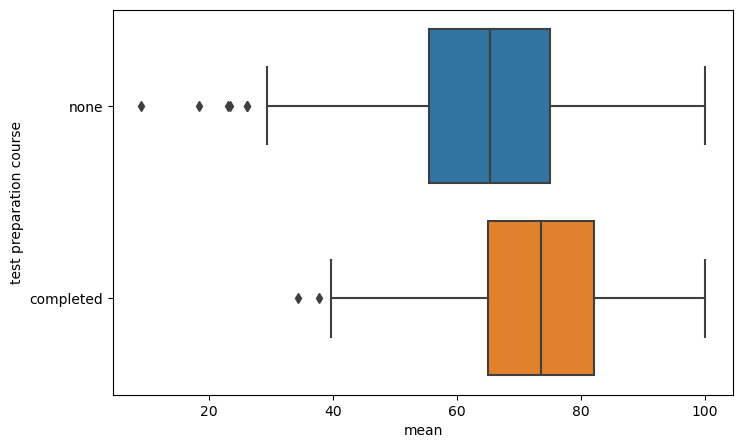

In [21]:
#define figure size
plt.figure(figsize=(8,5))
#display scatterplot
sns.boxplot(data=df_students, x='mean', y='test preparation course')
plt.show()

The average of students who took the preparatory course is higher than those who did not.